In [96]:
# Este notebook cria um dataset com a ocupação por dia, para um hotel/mês específico
# A ideia é fazer-se algo parecido, para todos os hoteis e por mês

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
xls = pd.ExcelFile('e-GDS-v3.xlsx')
reservas = pd.read_excel(xls, 'QuartosReservados')

In [98]:
reservas.dtypes

Hotel ID                          int64
Reserve ID                        int64
País                             object
Estado da reserva                object
Room ID                           int64
Tipo de Quarto                   object
RatePlan                         object
Data da reserva          datetime64[ns]
Data chegada             datetime64[ns]
Data de partida          datetime64[ns]
Número de noites                  int64
Quantidade de quartos             int64
Ocupação                          int64
Adultos                           int64
Crianças                          int64
Bebés                             int64
Preço (€)                       float64
dtype: object

In [99]:
reservas['Data chegada'] = reservas['Data chegada'].astype(str)
dates = reservas['Data chegada'].str.split('-', expand=True)
dates

,0,1,2
0,2023,04,08
1,2022,09,18
2,2022,08,26
3,2022,08,15
4,2022,08,21
...,...,...,...
25100,2023,03,22
25101,2022,11,18
25102,2022,11,04
25103,2022,03,01


In [100]:
reservas['Ano'] = dates[0]
reservas['Mes'] = dates[1]
reservas['Room ID'] = reservas['Room ID'].astype(str)

In [101]:
reservas.dtypes

Hotel ID                          int64
Reserve ID                        int64
País                             object
Estado da reserva                object
Room ID                          object
Tipo de Quarto                   object
RatePlan                         object
Data da reserva          datetime64[ns]
Data chegada                     object
Data de partida          datetime64[ns]
Número de noites                  int64
Quantidade de quartos             int64
Ocupação                          int64
Adultos                           int64
Crianças                          int64
Bebés                             int64
Preço (€)                       float64
Ano                              object
Mes                              object
dtype: object

In [102]:
# total_quartos = 5
# r_03 = reservas.loc[(reservas['Hotel ID'] == 493) & (reservas['Ano'] == '2022') & (reservas['Mes'] == '03')]

In [103]:
# r_03

In [104]:
reservas['Data chegada'] = pd.to_datetime(reservas['Data chegada'])

In [105]:
reservas

,Hotel ID,Reserve ID,País,Estado da reserva,Room ID,Tipo de Quarto,RatePlan,Data da reserva,Data chegada,Data de partida,Número de noites,Quantidade de quartos,Ocupação,Adultos,Crianças,Bebés,Preço (€),Ano,Mes
0,426,1699732,Portugal,Registado,1991,Duplo Premium - Cama de Casal,PROGRAMA PÁSCOA 2023,2023-03-17 17:30:20.343,2023-04-08,2023-04-09,1,1,2,2,0,1,180.00,2023,04
1,482,1569600,Portugal,Cancelado,2285,Apartamento T1,(WEB) Best Available Rate*,2022-08-16 14:32:23.007,2022-09-18,2022-09-30,12,5,1,5,0,0,4322.50,2022,09
2,482,1571909,Itália,Registado,2285,Apartamento T1,(WEB) Best Available Rate*,2022-08-19 20:56:43.180,2022-08-26,2022-09-16,21,1,2,2,0,0,3125.50,2022,08
3,482,1477657,Portugal,Registado,2286,Apartamento T2,(WEB) Best Available Rate*,2022-04-20 07:01:19.057,2022-08-15,2022-08-21,6,2,4,8,0,0,2964.00,2022,08
4,482,1538966,Portugal,Registado,2285,Apartamento T1,(WEB) Best Available Rate*,2022-07-09 17:15:40.713,2022-08-21,2022-08-27,6,2,4,8,0,0,2508.00,2022,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25100,332,1640661,Portugal,Registado,1472,Apartamento T1,Winter Promotion,2022-12-14 12:37:01.087,2023-03-22,2023-03-25,3,1,2,2,0,0,172.50,2023,03
25101,332,1614190,França,Registado,1472,Apartamento T1,Winter Promotion,2022-10-24 10:27:24.683,2022-11-18,2022-11-21,3,1,2,2,0,0,172.50,2022,11
25102,332,1594933,Portugal,Cancelado,1472,Apartamento T1,Winter Promotion,2022-09-23 18:48:32.453,2022-11-04,2022-11-06,2,1,3,3,0,0,148.18,2022,11
25103,332,1443455,Portugal,Registado,1472,Apartamento T1,Winter Promotion,2022-02-27 15:38:48.203,2022-03-01,2022-03-03,2,1,2,2,0,0,119.50,2022,03


In [106]:
reservas['Número de noites'].sum()


57287

In [107]:
# total_quartos*30

In [108]:
marco = pd.DataFrame(pd.date_range(start='2022-01-01', end='2023-12-31'), columns=['date'])
marco

,date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
725,2023-12-27
726,2023-12-28
727,2023-12-29
728,2023-12-30


In [109]:
joined = marco.set_index('date').join(reservas.set_index('Data chegada'))
joined = joined.fillna(0)
joined['Data chegada'] = joined.index
joined

,Hotel ID,Reserve ID,País,Estado da reserva,Room ID,Tipo de Quarto,RatePlan,Data da reserva,Data de partida,Número de noites,Quantidade de quartos,Ocupação,Adultos,Crianças,Bebés,Preço (€),Ano,Mes,Data chegada
date,,,,,,,,,,,,,,,,,,,
2022-01-01,309.0,1418228.0,Portugal,Modificada,1372,Quarto Duplo Standard,DB RO NRF,2022-01-01 12:19:43.463000,2022-01-02 00:00:00,1.0,1.0,2.0,2.0,0.0,0.0,38.7000,2022,01,2022-01-01
2022-01-02,539.0,1418318.0,Portugal,Registado,2542,Quarto Dpl. Standard,Bar,2022-01-01 19:27:10.147000,2022-01-03 00:00:00,1.0,1.0,1.0,1.0,0.0,0.0,30.0000,2022,01,2022-01-02
2022-01-02,311.0,1418210.0,Espanha,Registado,1407,DB - Quarto Duplo Standard,DB Room Only NRF,2022-01-01 10:17:09.290000,2022-01-03 00:00:00,1.0,1.0,2.0,2.0,0.0,0.0,63.0000,2022,01,2022-01-02
2022-01-02,414.0,1418334.0,Portugal,Registado,2049,Suite Junior,Normal - Bar,2022-01-01 21:06:19.357000,2022-01-03 00:00:00,1.0,1.0,2.0,2.0,0.0,0.0,100.0000,2022,01,2022-01-02
2022-01-02,283.0,1418305.0,Holanda,Registado,1241,Estudio,Standard,2022-01-01 18:30:17.650000,2022-01-05 00:00:00,3.0,1.0,1.0,1.0,0.0,0.0,126.0000,2022,01,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0,2023-12-27
2023-12-28,310.0,1692377.0,Portugal,Registado,1395,Quarto Duplo Standard,MR - Main Rate,2023-03-07 09:42:07.003000,2023-12-31 00:00:00,3.0,1.0,2.0,2.0,0.0,0.0,146.5185,2023,12,2023-12-28
2023-12-29,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0,2023-12-29


In [110]:
table = pd.pivot_table(joined, values='Número de noites', index=['Data chegada'],columns=['Room ID'], aggfunc=np.sum, fill_value=0).reset_index()
table

Room ID,Data chegada,0,1103,1104,1105,1159,1162,1163,1164,1178,...,92,935,936,937,938,939,940,954,983,984
0,2022-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-05,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,2023-12-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,2023-12-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,2023-12-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
columns = [col for col in table.columns if col not in ["Room ID", "Data chegada", "0"]]

for column in columns:
    lista = table[column].to_numpy()
    for index in range(len(lista)):
        if index > 0:
            if lista[index - 1] > 0:
                lista[index] = lista[index - 1] - 1
    table[column] = lista

In [112]:
columns = [col for col in table.columns if col not in ['Room ID', 'Data chegada', '0']]

for column in columns:
    lista = table[column].to_numpy()
    zeros = [0] * len(lista)
    for index in range(len(lista)):
        if index > 0:
            if lista[index-1] > 0:
                lista[index] = lista[index-1] - 1
    table[column] = (lista != zeros).astype(int)


In [113]:
columns = [col for col in table.columns if col not in ["Room ID", "Data chegada", "0"]]

table["occupation"] = table[columns].sum(axis=1) / len(columns)
# table.to_csv("occupation.csv", index=False)

/var/folders/gv/cj80cj516nz01gjy7tt3pmgm0000gn/T/ipykernel_554/2924295176.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table["occupation"] = table[columns].sum(axis=1) / len(columns)


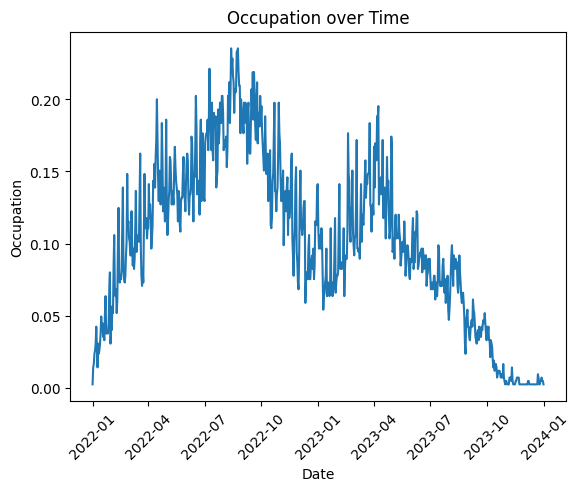

In [114]:
# Convert the "Data chegada" column to datetime format
table["Data chegada"] = pd.to_datetime(table["Data chegada"])

# Create the plot
plt.plot(table["Data chegada"], table["occupation"])
plt.xlabel("Date")
plt.ylabel("Occupation")
plt.title("Occupation over Time")
plt.xticks(rotation=45)
plt.show()